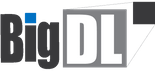

# Vision Transformer Examples for InferenceOptimizer

## step0 : Prepare Environment

In [1]:
import torch
from torch.utils.data import DataLoader, Dataset


class RandomDataset(Dataset):
    """
    Random Dataset.

    This class is modified from RandomDataset in
    https://github.com/PyTorchLightning/pytorch-lightning/
    blob/master/pytorch_lightning/demos/boring_classes.py

    :param _type_ Dataset: _description_
    """

    def __init__(self, length: int, w: int, h: int):
        self.len = length
        self.data = torch.randn(length, 3, w, h)

    def __getitem__(self, index):
        return self.data[index], 0

    def __len__(self) -> int:
        return self.len

In [2]:
from bigdl.nano.pytorch import InferenceOptimizer

In [ ]:
from models.mobilevit import mobilevit_xxs, count_parameters

model = mobilevit_xxs()
print(count_parameters(model))

dataset = RandomDataset(1000, 256, 256)
loader = DataLoader(dataset, batch_size=1)

optimizer = InferenceOptimizer()
optimizer.optimize(model, training_data=loader,
                   cpu_num=1, latency_sample_num=100)
for key, value in optimizer.optimized_model_dict.items():
    print("accleration option: {}, latency: {:.4f}ms".format(key, value["latency"]))


## Results

It will take about 3 minutes to run inference optimization. Then you can find the result for inference as follows:
```
accleration option: original, latency: 47.4641ms
accleration option: fp32_ipex, latency: 38.7184ms
accleration option: bf16_ipex, latency: 134.9574ms
accleration option: int8, latency: 37.4700ms
accleration option: jit_fp32, latency: 25.0726ms
accleration option: jit_fp32_ipex, latency: 24.5211ms
accleration option: jit_fp32_ipex_clast, latency: 18.4925ms
accleration option: onnxruntime_fp32, latency: 34.1868ms
accleration option: onnxruntime_int8_qlinear, latency: 14.7089ms
accleration option: onnxruntime_int8_integer, latency: 21.9793ms
```